 # Intel Scene Multi-Class Image Classification


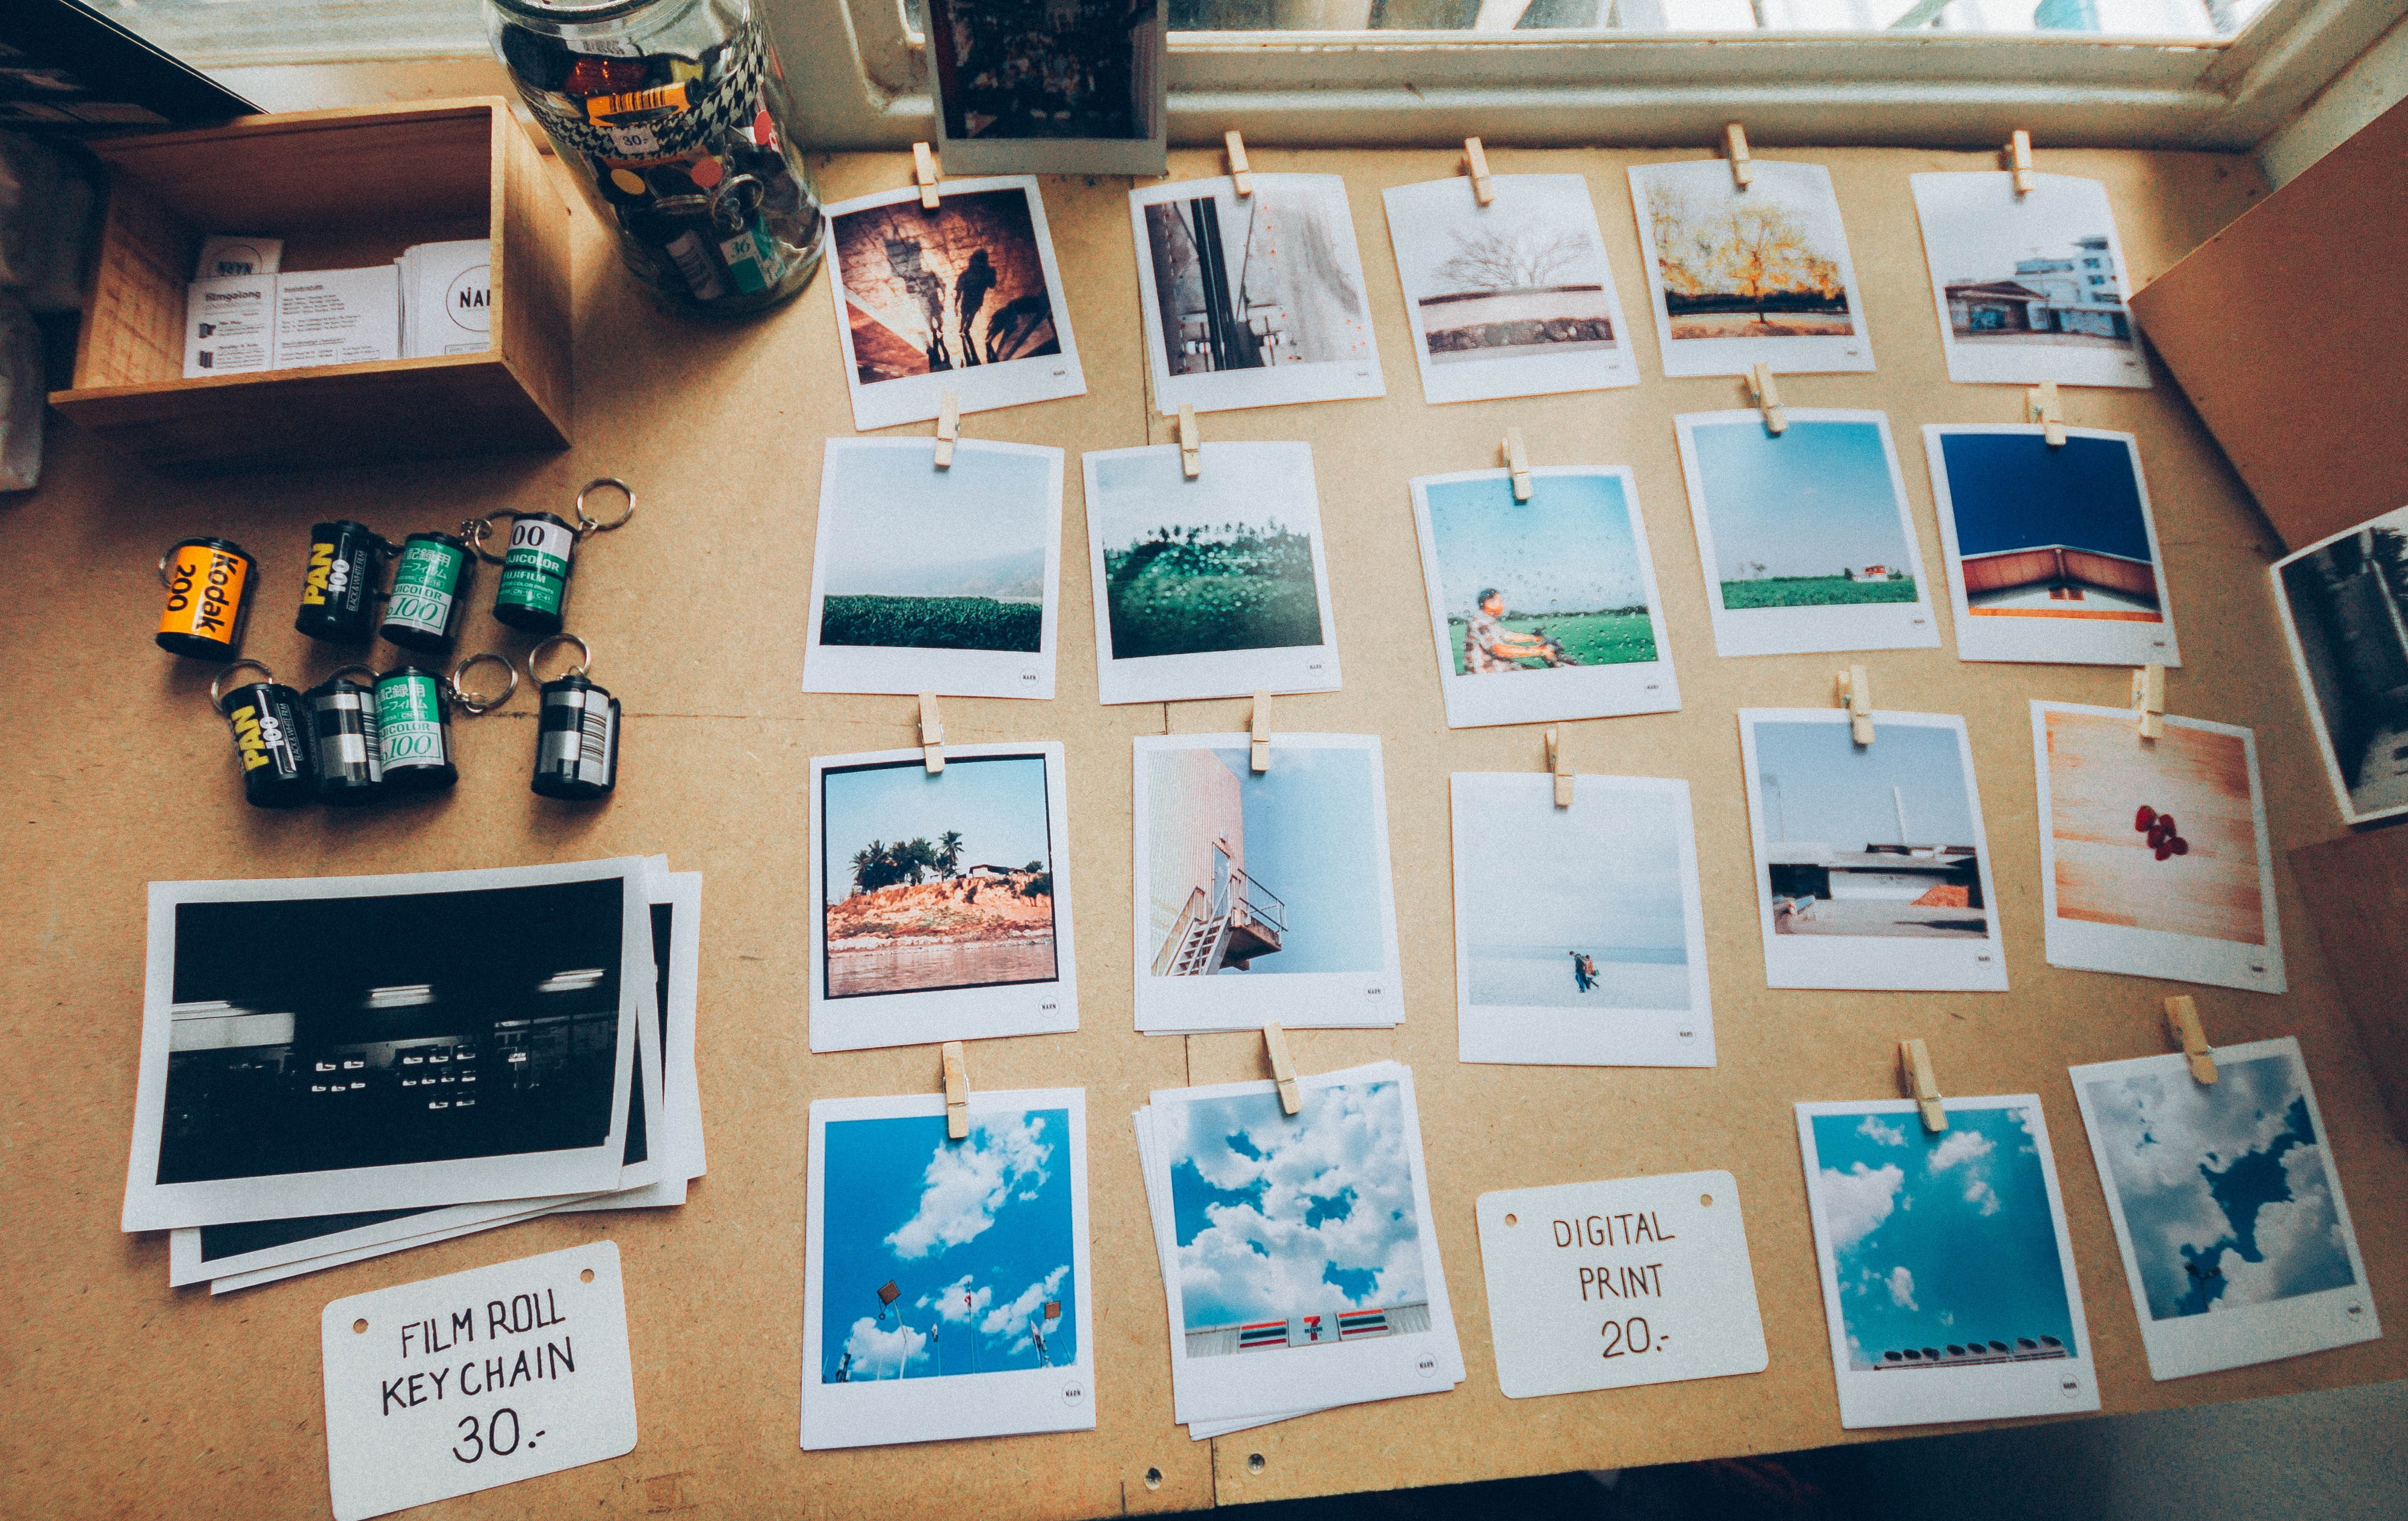

In [ ]:
from IPython.display import Image
Image("/content/intel Scene.jpeg") 

Identifying natural scenes from all around the world is an interesting computer vision problem. In this challenge, we are going to classify six different category Imges.This dataset contains about ~25k images from a wide range of natural scenes from all around the world. The task is to identify which kind of scene can the image be categorized into.

It is a 6 class problem

- Buildings
-Forests
-Mountains
- Glacier
- Street
- Sea


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d puneet6060/intel-image-classification

 95% 328M/346M [00:02<00:00, 139MB/s]
100% 346M/346M [00:02<00:00, 158MB/s]


## Given data is in Zip format. So first we have to unzip the files

In [5]:
!unzip "/content/intel-image-classification.zip"

Streaming output truncated to the last 5000 lines.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jp

## Import the libraries:

In [7]:
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

##Visualize some Random Images from Training set

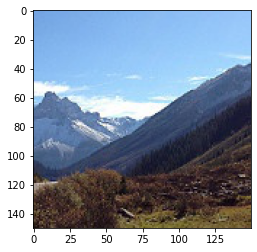

In [24]:
image = load_img("/content/seg_train/seg_train/mountain/10008.jpg")
plt.imshow(image)

## Transforms for image -augmentations


In [53]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Add data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,horizontal_flip=True,shear_range=0.2,  
    zoom_range=0.2, validation_split=0.2)

train_generator=train_datagen.flow_from_directory(
      '/content/seg_train/seg_train',
      target_size=(150,150),
      batch_size=64,
      class_mode='sparse',
      seed=2209,
      subset='training'
    
)

validation_generator=train_datagen.flow_from_directory(
      '/content/seg_train/seg_train',
      target_size=(150,150),
      batch_size=64,
      class_mode='sparse',
      seed=2209,
      subset='validation'
    
)

test_datagen = ImageDataGenerator(rescale = 1./255.)
test_generator = test_datagen.flow_from_directory(
    "/content/seg_test/seg_test", 
    target_size=(150,150),
    batch_size=32,
    class_mode='sparse',
    seed=2209
) 


Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [43]:
training_set.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

## Generator work

In [54]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

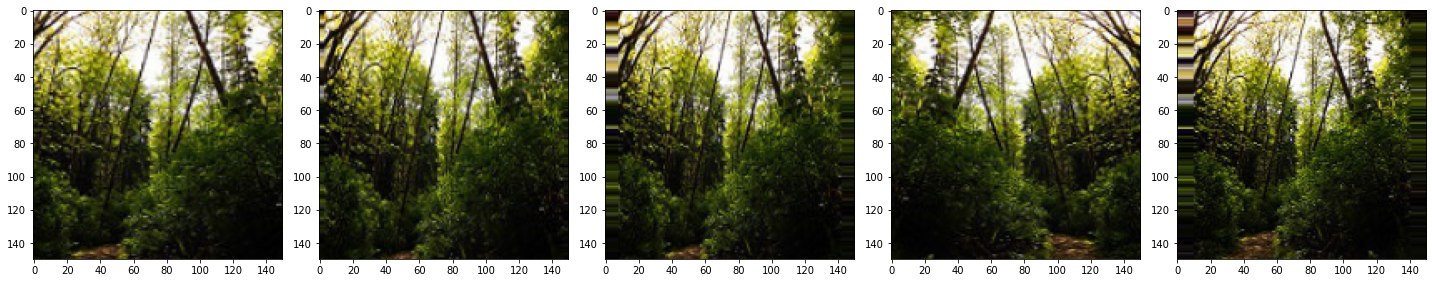

In [55]:
images = [train_generator[0][0][0] for i in range(5)]
plotImages(images)

## Build Model

In [46]:
import tensorflow as tf
from keras import regularizers

model=tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.Conv2D(16,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(3,3),
    
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
   
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Conv2D(256,(3,3),activation='relu',padding='same'),
    tf.keras.layers.Conv2D(256,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    
  
    tf.keras.layers.Flatten(),
       
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Dense(6,activation='softmax')
])

In [56]:
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

## Model summary

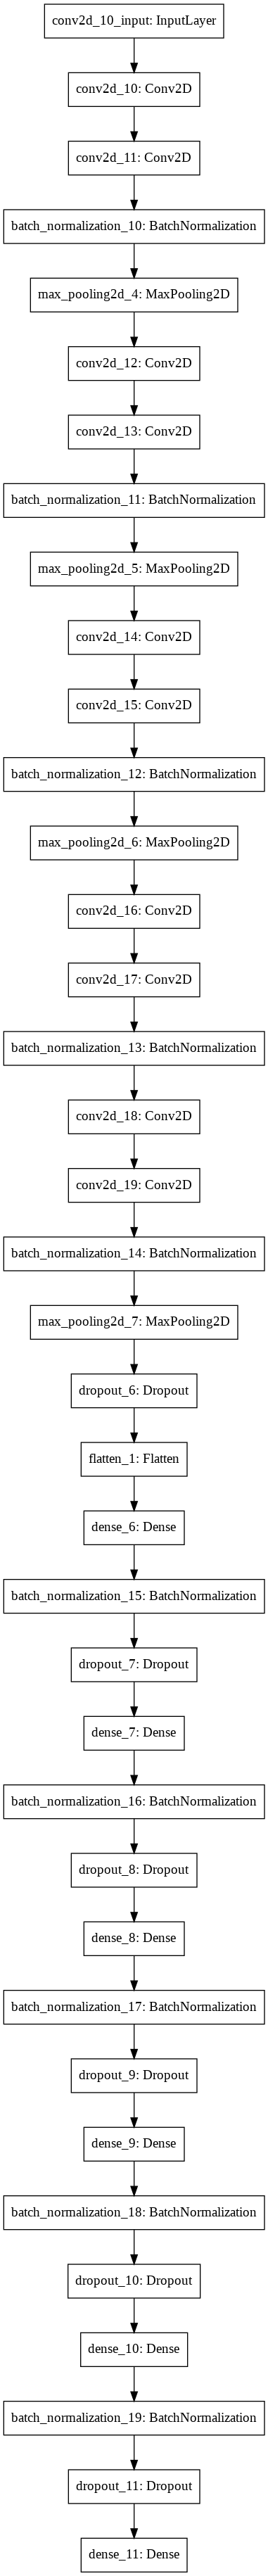

In [93]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False)

In [57]:
# Show a summary of the model. Check the number of trainable parameters
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 146, 146, 16)      2320      
_________________________________________________________________
batch_normalization_10 (Batc (None, 146, 146, 16)      64        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 46, 46, 32)        4640      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 44, 44, 32)        9248      
_________________________________________________________________
batch_normalization_11 (Batc (None, 44, 44, 32)       

## Fit Model

In [60]:
history=model.fit_generator(
  train_generator,
  steps_per_epoch=int(11230/64),
  epochs=50,
  validation_data=validation_generator,
  validation_steps=int(2804/64),
  verbose=1
)

Epoch 1/50
175/175 [==============================] - 73s 415ms/step - loss: 1.1221 - accuracy: 0.5537 - val_loss: 1.8152 - val_accuracy: 0.4985
Epoch 2/50
175/175 [==============================] - 72s 412ms/step - loss: 0.9996 - accuracy: 0.6287 - val_loss: 0.9801 - val_accuracy: 0.6319
Epoch 3/50
175/175 [==============================] - 72s 411ms/step - loss: 0.9020 - accuracy: 0.6994 - val_loss: 1.7223 - val_accuracy: 0.4742
Epoch 4/50
175/175 [==============================] - 72s 413ms/step - loss: 0.8272 - accuracy: 0.7268 - val_loss: 1.0264 - val_accuracy: 0.6493
Epoch 5/50
175/175 [==============================] - 80s 455ms/step - loss: 0.7799 - accuracy: 0.7491 - val_loss: 1.0333 - val_accuracy: 0.6359
Epoch 6/50
175/175 [==============================] - 72s 410ms/step - loss: 0.7255 - accuracy: 0.7739 - val_loss: 0.7178 - val_accuracy: 0.7449
Epoch 7/50
175/175 [==============================] - 72s 410ms/step - loss: 0.6838 - accuracy: 0.7882 - val_loss: 1.4245 - val_ac

## Save Model

## Virtualize Training

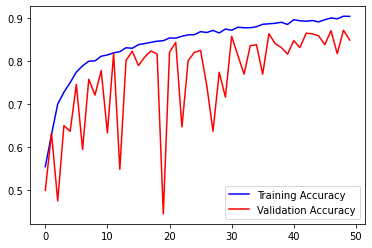

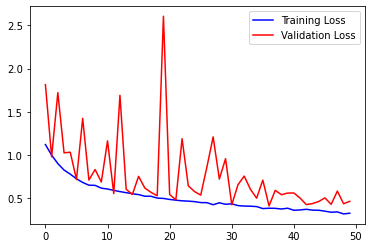

In [66]:
%matplotlib inline
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(50) #No. of epochs

#Plot training and validation accuracy per epoch
import matplotlib.pyplot as plt
plt.plot(epochs,acc,'b',label='Training Accuracy')
plt.plot(epochs,val_acc,'r',label='Validation Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'b',label='Training Loss')
plt.plot(epochs,val_loss,'r',label='Validation Loss')
plt.legend()
plt.show()

# Prepare Evaluate Generator for Model

In [67]:
accuracy=model.evaluate_generator(test_generator, steps=len(test_generator)//32,verbose=2)
print('Accuracy of the model on the test set: ',accuracy[1])

2/2 - 0s - loss: 0.3882 - accuracy: 0.8438
Accuracy of the model on the test set:  0.84375


# Test Model performance on custom data:

In [91]:
import numpy as np
from tensorflow.keras.preprocessing import image

def pred(path):
  test_image = image.load_img(path, target_size = (150,150))
  plt.imshow(test_image)
  test_image=np.expand_dims(test_image,axis=0)
  test_image=np.array(test_image)
  test_image=test_image/255
  prediction =np.argmax(model.predict(test_image),axis=1)
  result={0: 'buildings',1: 'forest', 2: 'glacier', 3: 'mountain', 4: 'sea', 5: 'street'}
  return print(result[prediction[0]])

forest


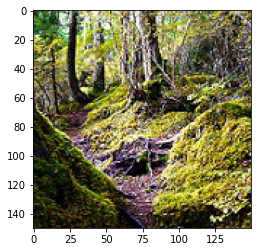

In [99]:
pred('/content/seg_pred/seg_pred/10021.jpg')

street


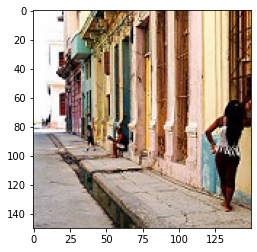

In [100]:
pred('/content/seg_pred/seg_pred/10045.jpg')